In [182]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import cv2
import random as rd
import pandas as pd
import seaborn as sns
import numpy as np

In [116]:
data = load_digits()

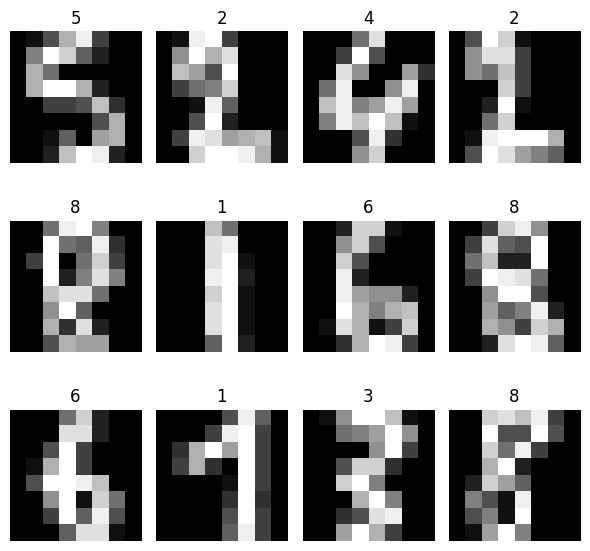

In [117]:
plt.figure(figsize=(6,6))
for i in range(12):
    index = rd.randint(0,1796)
    plt.subplot(3,4,i+1)
    plt.title(data.target[index])
    plt.imshow(data.images[index],cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [118]:
df = pd.DataFrame(data.data)

In [119]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [120]:
df['target'] = data.target

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [122]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = RandomForestClassifier(n_estimators=50,random_state=9)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.9833333333333333


In [124]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       1.00      0.95      0.97        40
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



<Axes: >

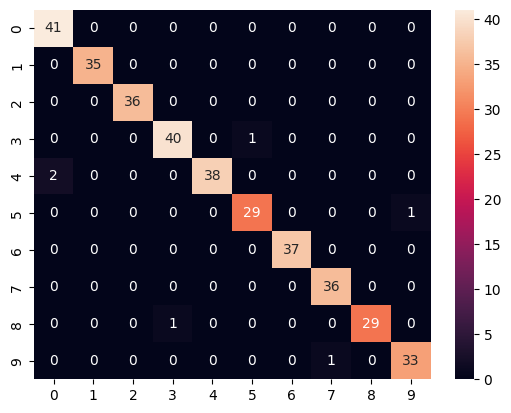

In [125]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [128]:
from keras.datasets import mnist

In [207]:
(X_train,y_train),(x_test,y_test) = mnist.load_data()

In [208]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train

In [209]:
clf = RandomForestClassifier(n_estimators=50,random_state=9)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

ValueError: X has 1 features, but RandomForestClassifier is expecting 784 features as input.